In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

#### Loading the data ####

In [2]:
data = pd.read_csv('C:/Users/Sarthak/Documents/googleplaystore.csv')
data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8353,Fix Error Google Playstore,BOOKS_AND_REFERENCE,4.3,18,5.7M,"1,000+",Free,0,Everyone,Books & Reference,"July 22, 2017",1.0,4.0 and up
1397,Calorie Counter by FatSecret,HEALTH_AND_FITNESS,4.4,229210,Varies with device,"10,000,000+",Free,0,Everyone,Health & Fitness,"July 31, 2018",Varies with device,Varies with device
10544,FK Dukla Prague,SPORTS,NaN,0,26M,10+,Free,0,Everyone,Sports,"February 28, 2018",1.0,4.1 and up
3477,Google Docs,PRODUCTIVITY,4.3,815981,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
4287,K PLUS,FINANCE,4.4,124324,Varies with device,"10,000,000+",Free,0,Everyone,Finance,"June 26, 2018",4.6.0,4.2 and up


### Assessing data ###

In [3]:
data.shape

(10841, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### Data Preprocessing: ####

In [5]:
# Check if duplicates exist
data.duplicated().sum()

483

In [6]:
# droping duplicates
data.drop_duplicates(inplace=True)
# rechecking dataframe
sum(data.duplicated())

0

In [7]:
# checking for unique values
data.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [8]:
#Dropping Rows with Null values
print(data.isnull().sum())
data.dropna(inplace=True)

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


##### Handling datatypes: #####

Define: 

'Installs' column shows datatype string which needs to be converted to float after omitting the special characters.

Code:

In [9]:
newInstalls = []

for row in data.Installs:
    
    row = row[:-1]
    newRow = row.replace(",", "")
    newInstalls.append(float(newRow))
    

data.Installs = newInstalls
data.Installs.head()

0       10000.0
1      500000.0
2     5000000.0
3    50000000.0
4      100000.0
Name: Installs, dtype: float64

Define:

Changing 'Category', 'Type' & 'Content Rating' columns to category.

Code:

In [10]:
data['Category'] = data.Category.astype('category')
data['Type'] = data.Type.astype('category')
data['Content Rating'] = data['Content Rating'].astype('category')

Define:

'Size' column shows datatype string which needs to be converted to float after omitting the special characters.

Code:

In [11]:
# Data cleaning for "Size" column
data['Size'] = data['Size'].map(lambda x: x.rstrip('M'))
data['Size'] = data['Size'].map(lambda x: str(round((float(x.rstrip('k'))/1024), 1)) if x[-1]=='k' else x)
data['Size'] = data['Size'].map(lambda x: np.nan if x.startswith('Varies') else x)

In [12]:
# Converting Size to float
data['Size'] = data['Size'].astype('float')

Define:

A close look at the data reveals 'Reviews' column has a single entry of 3.0M whereas rest are numeric. Therefore this needs to handled.

Code:

In [13]:
# Data cleaning for "Reviews" column
data['Reviews'] = data['Reviews'].map(lambda x: float(x.rstrip('M'))*1000000)

In [14]:
#droping nulls again
print(data.isnull().sum())
data.dropna(inplace=True)

App                  0
Category             0
Rating               0
Reviews              0
Size              1468
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64


Re-checking datatypes:

In [15]:
data.dtypes

App                 object
Category          category
Rating             float64
Reviews            float64
Size               float64
Installs           float64
Type              category
Price               object
Content Rating    category
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
dtype: object

##### Droping all irrelavant columns#####

In [16]:
#Droping all irrelavant columns
data = data.drop(['Price', 'Genres', 'Last Updated','Current Ver','Android Ver'], axis = 1)
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,1.590000e+08,19.0,10000.0,Free,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,9.670000e+08,14.0,500000.0,Free,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,8.751000e+10,8.7,5000000.0,Free,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,2.156440e+11,25.0,50000000.0,Free,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,9.670000e+08,2.8,100000.0,Free,Everyone


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7418 entries, 0 to 10840
Data columns (total 8 columns):
App               7418 non-null object
Category          7418 non-null category
Rating            7418 non-null float64
Reviews           7418 non-null float64
Size              7418 non-null float64
Installs          7418 non-null float64
Type              7418 non-null category
Content Rating    7418 non-null category
dtypes: category(3), float64(4), object(1)
memory usage: 371.3+ KB


In [18]:
# View descriptive statistics of the dataframe
data.describe()

,Rating,Reviews,Size,Installs
count,7418.000000,7.418000e+03,7418.000000,7.418000e+03
mean,4.171394,2.789961e+11,22.760461,7.830035e+06
std,0.549812,1.744309e+12,23.439559,4.632233e+07
min,1.000000,1.000000e+06,0.000000,1.000000e+00
25%,4.000000,9.900000e+07,5.100000,1.000000e+04
50%,4.300000,2.067500e+09,14.000000,1.000000e+05
75%,4.500000,3.690075e+10,33.000000,1.000000e+06
max,5.000000,4.489389e+13,100.000000,1.000000e+09


#### Analysing the data ####

 #### Q: Do Free apps get installed more than Paid apps?

In [19]:
avg_free_installs = data[data['Type']=='Free'].mean()['Installs']
avg_paid_installs = data[data['Type']=='Paid'].mean()['Installs']
avg_free_installs, avg_paid_installs

(8444519.269023716, 80768.40733944954)

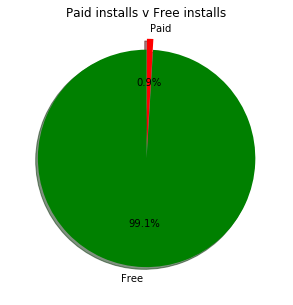

In [20]:
plt.figure(figsize = [10, 5])
plt.title('Paid installs v Free installs')
plt.pie([avg_free_installs, avg_paid_installs], explode=(0, 0.1), labels=['Free','Paid'], colors = ['Green','Red'],
        autopct='%1.1f%%', shadow=True, startangle=90);

The average installation of free apps are way higher than the average installation of paid apps.

#### Q: Which are the most popular categories among developers?

In [21]:
data.Category.value_counts()

FAMILY                 1590
GAME                    959
TOOLS                   633
MEDICAL                 277
PERSONALIZATION         277
LIFESTYLE               273
FINANCE                 263
SPORTS                  232
PRODUCTIVITY            231
BUSINESS                225
PHOTOGRAPHY             225
COMMUNICATION           206
HEALTH_AND_FITNESS      199
SOCIAL                  170
NEWS_AND_MAGAZINES      162
SHOPPING                159
TRAVEL_AND_LOCAL        147
BOOKS_AND_REFERENCE     143
DATING                  141
VIDEO_PLAYERS           116
EDUCATION                95
MAPS_AND_NAVIGATION      95
FOOD_AND_DRINK           82
ENTERTAINMENT            67
AUTO_AND_VEHICLES        63
LIBRARIES_AND_DEMO       61
ART_AND_DESIGN           58
WEATHER                  51
HOUSE_AND_HOME           50
COMICS                   49
PARENTING                44
EVENTS                   38
BEAUTY                   37
Name: Category, dtype: int64

Therefore Family and Game are the two most popular categories among developers.

#### Q: Which are the most popular categories among users?

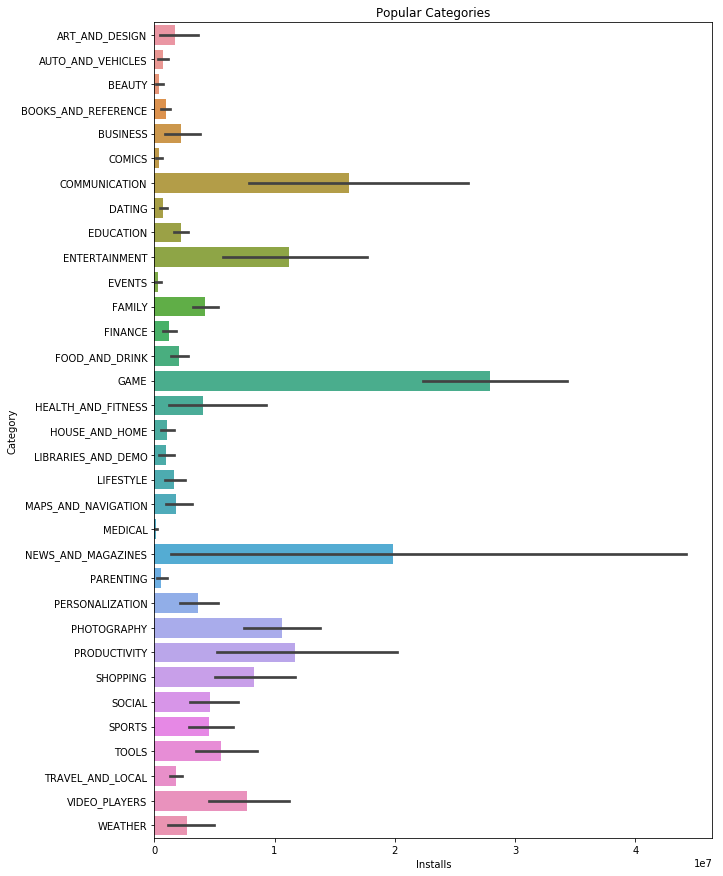

In [22]:
plt.figure(figsize = [10, 15])
plt.title('Popular Categories')
sb.barplot(data= data, y = 'Category', x = 'Installs');

Therefore the above visuals clarifies the most popular category is COMMUNICATION while the MEDICAL category has the least popularity.

#### Q: Does app rating influence app installation?

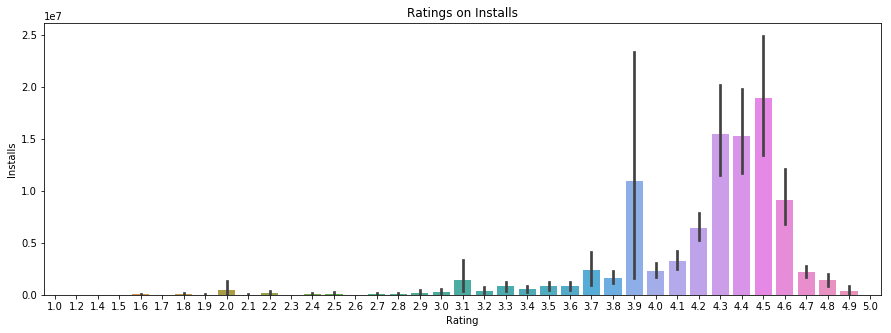

In [23]:
plt.figure(figsize = [15, 5])
plt.title('Ratings on Installs')
sb.barplot(data= data, y = 'Installs', x = 'Rating');

Hence, we can clearly state that the apps with rating within 3.9 to 4.6 have the most installations. It is note worthy that highest rated apps have not been installed most. This is probably due to human bias that most people dont give full ratings to apps even when they like it.